In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

In [50]:
df=pd.read_csv("C:\\Users\\tejal\\Downloads\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
df['Class'].value_counts()#0=normal ,1=fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [52]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [53]:
X=df.drop(columns=['Class'])
Y=df['Class']

In [54]:
#scale time and amount
scaler=StandardScaler()
X[['Time','Amount']] = scaler.fit_transform(X[['Time','Amount']])
X[['Time','Amount']]

,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403
...,...,...
284802,1.641931,-0.350151
284803,1.641952,-0.254117
284804,1.641974,-0.081839
284805,1.641974,-0.313249


In [68]:
X_train_all, X_test, Y_train_all, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

In [69]:
X_train_all

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.413095,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.323963
180305,0.624644,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.341275
42664,-1.129186,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346835
198723,0.796203,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.328841
82325,-0.746606,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.113883,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,-0.329281
85418,-0.717019,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,-0.205340
29062,-1.253217,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,-0.171636
13766,-1.482496,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,...,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,-0.349671


In [70]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,1.388689,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.261273
11378,-1.578646,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.305852
147283,-0.136621,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.049095
219439,0.988041,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.349271
36939,-1.180778,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.347232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,-1.020990,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,...,-0.207556,0.183183,0.695818,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,-0.209418
184616,0.663243,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,...,0.340394,-0.058383,-0.479606,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,0.836721
274532,1.500506,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,...,-0.222906,-0.120079,-0.388817,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,-0.287701
269819,1.452473,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,...,0.024393,0.327882,0.932738,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,-0.273468


In [71]:
Y_train_all

265518    0
180305    0
42664     0
198723    0
82325     0
         ..
233802    0
85418     0
29062     0
13766     0
17677     0
Name: Class, Length: 227845, dtype: int64

In [72]:
Y_test

263020    0
11378     0
147283    0
219439    0
36939     0
         ..
54199     0
184616    0
274532    0
269819    0
64170     0
Name: Class, Length: 56962, dtype: int64

In [73]:
X_train = X_train_all[Y_train_all==0]
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.413095,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.323963
180305,0.624644,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.341275
42664,-1.129186,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346835
198723,0.796203,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.328841
82325,-0.746606,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.113883,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,-0.329281
85418,-0.717019,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,-0.205340
29062,-1.253217,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,-0.171636
13766,-1.482496,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,...,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,-0.349671


In [74]:
print("Train normals:", X_train.shape)
print("Test set:", X_test.shape)

Train normals: (227451, 30)
Test set: (56962, 30)


In [75]:
input_dim=X_train.shape[1]
input_dim

30

In [76]:
#build autoencoder
input_layer=layers.Input(shape=(input_dim,))
input_layer

<KerasTensor shape=(None, 30), dtype=float32, sparse=False, ragged=False, name=keras_tensor_8>

In [77]:
# Encoder
encoded = layers.Dense(32, activation="relu")(input_layer)
encoded = layers.Dense(16, activation="relu")(encoded)
bottleneck = layers.Dense(8, activation="relu", activity_regularizer=regularizers.l1(1e-5))(encoded)


In [78]:
# Decoder
decoded = layers.Dense(16, activation="relu")(bottleneck)
decoded = layers.Dense(32, activation="relu")(decoded)
output_layer = layers.Dense(input_dim, activation="linear")(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

In [79]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,334 (13.02 KB)

 Trainable params: 3,334 (13.02 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
history=autoencoder.fit(X_train,X_train,epochs=20,batch_size=256,validation_split=0.1,shuffle=True,verbose=2)

Epoch 1/20
800/800 - 3s - 4ms/step - loss: 0.1210 - val_loss: 0.1207
Epoch 2/20
800/800 - 3s - 4ms/step - loss: 0.1204 - val_loss: 0.1218
Epoch 3/20
800/800 - 3s - 4ms/step - loss: 0.1207 - val_loss: 0.1197
Epoch 4/20
800/800 - 3s - 4ms/step - loss: 0.1206 - val_loss: 0.1189
Epoch 5/20
800/800 - 3s - 4ms/step - loss: 0.1201 - val_loss: 0.1197
Epoch 6/20
800/800 - 3s - 4ms/step - loss: 0.1203 - val_loss: 0.1215
Epoch 7/20
800/800 - 3s - 4ms/step - loss: 0.1202 - val_loss: 0.1219
Epoch 8/20
800/800 - 3s - 4ms/step - loss: 0.1194 - val_loss: 0.1192
Epoch 9/20
800/800 - 3s - 4ms/step - loss: 0.1201 - val_loss: 0.1214
Epoch 10/20
800/800 - 3s - 4ms/step - loss: 0.1192 - val_loss: 0.1194
Epoch 11/20
800/800 - 3s - 4ms/step - loss: 0.1202 - val_loss: 0.1197
Epoch 12/20
800/800 - 3s - 4ms/step - loss: 0.1214 - val_loss: 0.1197
Epoch 13/20
800/800 - 3s - 4ms/step - loss: 0.1190 - val_loss: 0.1188
Epoch 14/20
800/800 - 3s - 4ms/step - loss: 0.1194 - val_loss: 0.1186
Epoch 15/20
800/800 - 3s - 4m

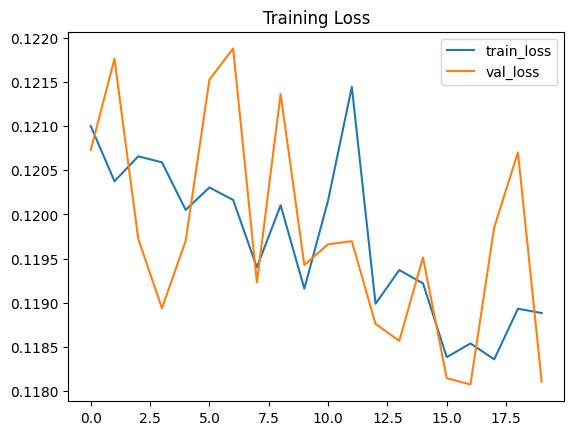

In [100]:
# Plot training loss
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.title("Training Loss")
plt.show()

In [101]:
#evalute the model
# Predict on test set
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [102]:
# Pick threshold (here simple: mean + 3*std on training errors)
X_train_pred = autoencoder.predict(X_train)
train_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
threshold = train_mse.mean() + 3*train_mse.std()

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [103]:
print("Threshold:", threshold)

Threshold: 0.7355348138275729


In [104]:
# Predictions
y_pred = (mse > threshold).astype(int)
y_pred

263020    0
11378     0
147283    0
219439    0
36939     0
         ..
54199     0
184616    0
274532    0
269819    0
64170     0
Length: 56962, dtype: int64

In [105]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("ROC AUC:", roc_auc_score(Y_test, mse))

Confusion Matrix:
 [[56081   783]
 [   25    73]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.74      0.15        98

    accuracy                           0.99     56962
   macro avg       0.54      0.87      0.57     56962
weighted avg       1.00      0.99      0.99     56962

ROC AUC: 0.9472902765495619


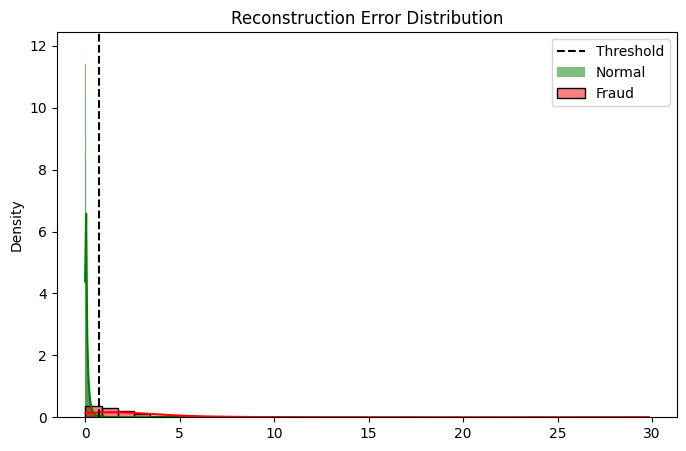

In [106]:
# Plot distribution of reconstruction errors
plt.figure(figsize=(8,5))
sns.histplot(mse[Y_test==0], label="Normal", color="green", kde=True, stat="density")
sns.histplot(mse[Y_test==1], label="Fraud", color="red", kde=True, stat="density")
plt.axvline(threshold, color="black", linestyle="--", label="Threshold")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()
